How predictive is a batter's platoon split?

Should we look at individual batters' platoon splits?  Regress them?

In [2]:
import pandas as pd
import numpy as np
import boxball_loader as bbl
import baseball_stats_utils as utils

In [3]:
cols = ['bat_team_id', 'fld_team_id', 'bat_id', 'pit_id', 'pos2_fld_id', 'bat_event_fl', 'bat_hand_cd', 'pit_hand_cd', 'event_cd']
pa = bbl.load_event_data(2015, 2020, cols)
pa


,game_id,date,game_type,tb_ct,fld_team_id,ab_fl,bat_team_id,pos2_fld_id,bat_event_fl,bat_hand_cd,pit_id,pit_hand_cd,event_cd,bat_id,h_fl,ob_fl,yr
0,CHN201504050,2015-04-05,RS,0,CHN,True,SLN,rossd001,True,L,lestj001,L,2,carpm002,0,0,2015
1,CHN201504050,2015-04-05,RS,2,CHN,True,SLN,rossd001,True,L,lestj001,L,21,heywj001,1,1,2015
2,CHN201504050,2015-04-05,RS,1,CHN,True,SLN,rossd001,True,R,lestj001,L,20,hollm001,1,1,2015
3,CHN201504050,2015-04-05,RS,0,CHN,True,SLN,rossd001,True,R,lestj001,L,3,peraj001,0,0,2015
4,CHN201504050,2015-04-05,RS,0,CHN,True,SLN,rossd001,True,L,lestj001,L,3,adamm002,0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037442,KCA202009270,2020-09-27,RS,0,DET,True,KCA,haase001,True,R,farmb001,R,3,peres002,0,0,2020
1037443,KCA202009270,2020-09-27,RS,0,KCA,False,DET,peres002,True,L,hahnj001,R,14,alcas002,0,1,2020
1037444,KCA202009270,2020-09-27,RS,0,KCA,True,DET,peres002,True,L,hahnj001,R,3,reyev001,0,0,2020
1037445,KCA202009270,2020-09-27,RS,0,KCA,True,DET,peres002,True,R,hahnj001,R,3,camed001,0,0,2020


In [4]:
pa.columns

Index(['game_id', 'date', 'game_type', 'tb_ct', 'fld_team_id', 'ab_fl',
       'bat_team_id', 'pos2_fld_id', 'bat_event_fl', 'bat_hand_cd', 'pit_id',
       'pit_hand_cd', 'event_cd', 'bat_id', 'h_fl', 'ob_fl', 'yr'],
      dtype='object')

In [7]:
utils.summarize_events(pa, ['bat_hand_cd', 'pit_hand_cd'])

pa      ob      ab      h        tb      k  \
bat_hand_cd pit_hand_cd                                                   
?           B                 1       0       1      0       0.0      0   
L           L             75946   23215   68022  16311   25349.0  17622   
            R            335622  108312  297413  75858  127500.0  69444   
R           L            191473   61318  171048  44279   73881.0  40912   
            R            388623  118917  351245  87645  144701.0  88170   

                            bb     hr        ba       obp       slg      woba  \
bat_hand_cd pit_hand_cd                                                         
?           B                0      0  0.000000  0.000000  0.000000  0.000000   
L           L             5819   1813  0.239790  0.305678  0.372659  0.292981   
            R            29655  10760  0.255059  0.322720  0.428697  0.319645   
R           L            15581   6358  0.258869  0.320244  0.431931  0.319014   
            R            26871  12358  0.249527  0.305996  0.411966  0.305215   

                               k%       bb%       hr%  
bat_hand_cd pit_hand_cd                                
?           B            0.000000  0.000000  0.000000  
L           L            0.232033  0.076620  0.023872  
            R            0.206911  0.088358  0.032060  
R           L            0.213670  0.081374  0.033206  
            R            0.226878  0.069144  0.031799

In [9]:
utils.summarize_events(pa, ['bat_id', 'bat_hand_cd', 'pit_hand_cd'])

pa   ob    ab    h    tb    k   bb   hr  \
bat_id   bat_hand_cd pit_hand_cd                                              
aardd001 R           R               1    0     1    0     0    1    0    0   
abadf001 L           R               1    0     1    0     0    1    0    0   
abrej003 R           L             819  291   733  220   388  163   55   39   
                     R            2727  895  2498  718  1258  541  121  123   
ackld001 L           L              42   10    35    5     6   12    5    0   
...                                ...  ...   ...  ...   ...  ...  ...  ...   
zobrb001 L           R            1729  614  1484  394   626  210  214   45   
         R           L             625  224   542  156   227   83   64    8   
                     R               4    0     4    0     0    0    0    0   
zunim001 R           L             522  138   466   87   163  185   48   21   
                     R            1269  346  1149  235   479  457   83   60   

                                        ba       obp       slg      woba  \
bat_id   bat_hand_cd pit_hand_cd                                           
aardd001 R           R            0.000000  0.000000  0.000000  0.000000   
abadf001 L           R            0.000000  0.000000  0.000000  0.000000   
abrej003 R           L            0.300136  0.355311  0.529332  0.368305   
                     R            0.287430  0.328199  0.503603  0.345790   
ackld001 L           L            0.142857  0.238095  0.171429  0.195000   
...                                    ...       ...       ...       ...   
zobrb001 L           R            0.265499  0.355119  0.421833  0.335401   
         R           L            0.287823  0.358400  0.418819  0.333565   
                     R            0.000000  0.000000  0.000000  0.000000   
zunim001 R           L            0.186695  0.264368  0.349785  0.266123   
                     R            0.204526  0.272656  0.416884  0.292177   

                                        k%       bb%       hr%  
bat_id   bat_hand_cd pit_hand_cd                                
aardd001 R           R            1.000000  0.000000  0.000000  
abadf001 L           R            1.000000  0.000000  0.000000  
abrej003 R           L            0.199023  0.067155  0.047619  
                     R            0.198387  0.044371  0.045105  
ackld001 L           L            0.285714  0.119048  0.000000  
...                                    ...       ...       ...  
zobrb001 L           R            0.121457  0.123771  0.026027  
         R           L            0.132800  0.102400  0.012800  
                     R            0.000000  0.000000  0.000000  
zunim001 R           L            0.354406  0.091954  0.040230  
                     R            0.360126  0.065406  0.047281  

[3663 rows x 15 columns]

What to examine:
* Platoon split (difference in wOBA vs LHP and vs RHP)
* Look at LHB, RHB, SH separately
* Predict later years from earlier
 * Start with basic split, e.g. X=2015-2017; Y=2018-20
 * Then move up to more complex (e.g., use consecutive years, or career going into each year)
* Validate a simple heuristic: which is a better prediction: batter's existing split, or standard split?
* Then attempt to predict future split.  How to work in playing time?  Regression?

In [10]:
# Define X and Y

pa['XY'] = np.where(pa['yr']>=2018, 'Y', 'X')
pa['XY'].value_counts()

X    553503
Y    438162
Name: XY, dtype: int64

In [11]:

pa_rhb = pa[pa['bat_hand_cd']=='R']
pa_lhb = pa[pa['bat_hand_cd']=='L']


In [13]:
# Compute each player's platoon split in the X and Y samples
bat_splits = utils.summarize_events(pa_lhb, ['bat_id', 'pit_hand_cd', 'XY'])[['pa', 'woba']]
bat_splits

pa      woba
bat_id   pit_hand_cd XY                
abadf001 R           X      1  0.000000
ackld001 L           X     42  0.195000
         R           X    292  0.285349
adamc001 R           X    219  0.256338
                     Y     14  0.358000
...                       ...       ...
zimmb001 L           Y     45  0.257600
         R           X    252  0.303111
                     Y    133  0.257068
zobrb001 R           X   1196  0.333475
                     Y    533  0.339722

[1742 rows x 2 columns]

In [14]:
# let's start with everyone with at least 10 PA against both hands and in both samples
QUAL_PA = 100
qual = (bat_splits['pa']>=QUAL_PA).groupby('bat_id').sum()>=4
qual_bat = qual[qual==True].index
len(qual_bat)

71

In [16]:
pa_qual = pa[pa['bat_id'].isin(qual_bat)]
splits_qual = utils.summarize_events(pa_qual, ['bat_id', 'pit_hand_cd', 'XY'])[['pa', 'woba']]
splits_qual

pa      woba
bat_id   pit_hand_cd XY                
adamm002 L           X    140  0.272071
                     Y    109  0.290587
         R           X    740  0.330211
                     Y    612  0.314546
alony001 L           X    240  0.285767
...                       ...       ...
wongk001 R           Y    910  0.321479
yelic001 L           X    478  0.310209
                     Y    466  0.400017
         R           X   1401  0.360894
                     Y   1011  0.413897

[284 rows x 2 columns]

In [17]:
bat_diff = splits_qual.unstack(level=1)
bat_diff

pa            woba          
pit_hand_cd    L     R         L         R
bat_id   XY                               
adamm002 X   140   740  0.272071  0.330211
         Y   109   612  0.290587  0.314546
alony001 X   240  1214  0.285767  0.333395
         Y   209   700  0.299349  0.300400
bellc002 X   173   375  0.372578  0.368677
...          ...   ...       ...       ...
woltt001 Y   191   545  0.293916  0.262239
wongk001 X   339  1046  0.266885  0.320511
         Y   254   910  0.286528  0.321479
yelic001 X   478  1401  0.310209  0.360894
         Y   466  1011  0.400017  0.413897

[142 rows x 4 columns]

In [18]:
pl_splt = bat_diff['woba']['L']- bat_diff['woba']['R']
pl_splt

bat_id    XY
adamm002  X    -0.058139
          Y    -0.023959
alony001  X    -0.047629
          Y    -0.001051
bellc002  X     0.003901
                  ...   
woltt001  Y     0.031678
wongk001  X    -0.053626
          Y    -0.034952
yelic001  X    -0.050684
          Y    -0.013880
Length: 142, dtype: float64

<AxesSubplot:>

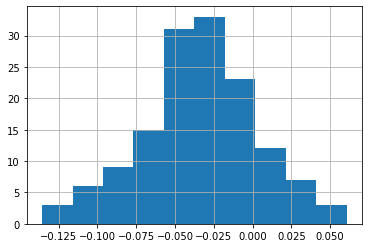

In [19]:
pl_splt.hist()

In [20]:
import plotly.express as px

In [21]:
fig = px.scatter(pl_splt.unstack().reset_index(), x='X', y='Y', trendline="ols", hover_name="bat_id"
                 , labels={'X': '2015-17', 'Y': '2018-20'})
fig.show()

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
pl_splt.unstack()['Y'].describe()

count    71.000000
mean     -0.026543
std       0.039738
min      -0.135596
25%      -0.049617
50%      -0.027502
75%      -0.001266
max       0.060575
Name: Y, dtype: float64

In [24]:
outputs = pl_splt.unstack()
outputs['base_pred'] = outputs['Y'].mean()

outputs

XY,X,Y,base_pred
bat_id,,,
adamm002,-0.058139,-0.023959,-0.026543
alony001,-0.047629,-0.001051,-0.026543
bellc002,0.003901,-0.044226,-0.026543
beltb001,-0.014311,-0.065136,-0.026543
benia002,-0.080690,-0.028506,-0.026543
...,...,...,...
thame001,-0.100033,-0.047143,-0.026543
vottj001,-0.010060,-0.042189,-0.026543
woltt001,-0.050684,0.031678,-0.026543


In [25]:
mean_squared_error(outputs['Y'], outputs['base_pred'], squared=False)

0.0394568431012477

In [26]:
mean_squared_error(outputs['Y'], outputs['X'], squared=False)

0.05490746497950473

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
reg = LinearRegression()
reg.fit(outputs[['X']], outputs['Y'])

LinearRegression()

In [29]:
outputs['lin_pred'] = reg.predict(outputs[['X']])
outputs

XY,X,Y,base_pred,lin_pred
bat_id,,,,
adamm002,-0.058139,-0.023959,-0.026543,-0.025333
alony001,-0.047629,-0.001051,-0.026543,-0.026137
bellc002,0.003901,-0.044226,-0.026543,-0.030083
beltb001,-0.014311,-0.065136,-0.026543,-0.028689
benia002,-0.080690,-0.028506,-0.026543,-0.023606
...,...,...,...,...
thame001,-0.100033,-0.047143,-0.026543,-0.022125
vottj001,-0.010060,-0.042189,-0.026543,-0.029014
woltt001,-0.050684,0.031678,-0.026543,-0.025903


In [30]:
mean_squared_error(outputs['Y'], outputs['lin_pred'], squared=False)

0.03937888091063136

In [32]:
reg.coef_, reg.intercept_

(array([-0.07657388]), -0.02978452422978049)